In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon # экспоненциальное
import math

Выберите непрерывное распределение.
Сгенерируйте из него выборку объёма 1000.
Постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

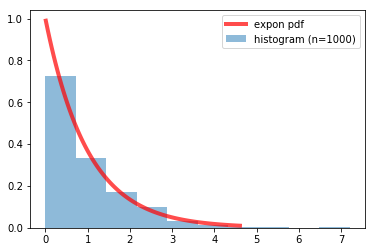

In [111]:
r=expon.rvs(size = 1000)

# Постройте гистограмму выборки
plt.hist(r, histtype='stepfilled', alpha = 0.5, normed=True, label='histogram (n=1000)')

# Нарисуйте поверх неё теоретическую плотность распределения
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
plt.plot(x, expon.pdf(x), 'r-', lw=4, alpha=0.7, label='expon pdf')
plt.legend(loc='best')

Для n (5, 15, 50, 100) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. 
Используя информацию о среднем и дисперсии исходного распределения, посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.

mean =  1.0 var =  1.0


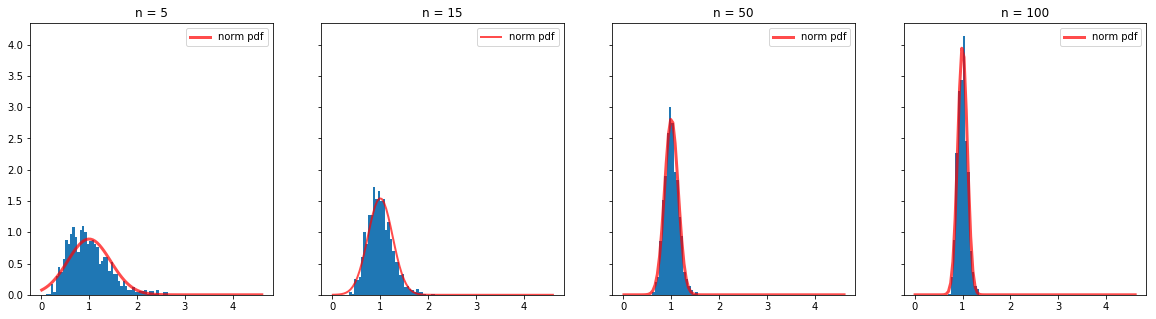

In [115]:
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(20, 5))

# Генерация выборок 
sample5 = np.array([expon.rvs(size = 5).mean() for j in range(1000)])
sample15 = np.array([expon.rvs(size = 15).mean() for j in range(1000)])
sample50 = np.array([expon.rvs(size = 50).mean() for j in range(1000)])
sample100 = np.array([expon.rvs(size = 100).mean() for j in range(1000)])

# Гистограммы распределений выборочных средних
ax[0].hist(sample5, bins =80, range=(0,4), normed=True)
ax[0].set_title('n = 5')
ax[1].hist(sample15, bins =80, range=(0,4), normed=True)
ax[1].set_title('n = 15')
ax[2].hist(sample50, bins =80, range=(0,4), normed=True)
ax[2].set_title('n = 50')
ax[3].hist(sample100, bins =80, range=(0,4), normed=True)
ax[3].set_title('n = 100')

# Используя информацию о среднем и дисперсии исходного распределения, 
# посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, 
# приближается распределение выборочных средних.

mean = expon.mean(loc=0, scale=1)
var = expon.var(loc=0, scale=1)

# среднее и дисперсия экспоненциального распределения
print "mean = ", mean, "var = ", var

var5 = var/5 # дисперсия для нормального распределения, приближающего выборку средних
norm5 = sts.norm(mean, math.sqrt(var5)) # math.sqrt(var5) - сигма для нормального распределения выборки средних
pdf5 = norm5.pdf(x[:500])

var15 = var/15
norm15 = sts.norm(mean, math.sqrt(var15))
pdf15 = norm15.pdf(x[:500])

var50 = var/50
norm50 = sts.norm(mean, math.sqrt(var50))
pdf50 = norm50.pdf(x[:500])

var100 = var/100
norm100 = sts.norm(mean, math.sqrt(var100))
pdf100 = norm100.pdf(x[:500])

# Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения 

ax[0].plot(x[:500], pdf5, 'r-', lw=3, alpha=0.7, label='norm pdf')
ax[1].plot(x[:500], pdf15, 'r-', lw=2, alpha=0.7, label='norm pdf')
ax[2].plot(x[:500], pdf50, 'r-', lw=3, alpha=0.7, label='norm pdf')
ax[3].plot(x[:500], pdf100, 'r-', lw=3, alpha=0.7, label='norm pdf')

for i in range(0,4):
    ax[i].legend()

###### Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

С ростом n точность аппроксимации распределения выборочных средних нормальным повышается, как и должно быть согласно ЦПТ.